In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from sys import path
from os.path import abspath
path.append(abspath("/home/ng136/nico"))
import ng_functions as ng

from glob import glob
from pathlib import Path
import warnings
from time import time
from tqdm import tqdm
from datetime import datetime

# Load annotated experiments 2 and 3

In [3]:
n_states = ['N1a', 'N1b', 'N2', 'N3', 'N4', 'N5', 'N6']

In [4]:
ndata = sc.read('/n/groups/klein/nico/neutrophils/backups/totalseq_exp2_neutrophils_untreated_annotated_embedding_5258x13126_backup_220422_15h46.h5ad')
tdata = sc.read('/n/groups/klein/nico/neutrophils/backups/totalseq_exp3_neutrophils_acd40_annotated_embedding_25210x17824_backup_220422_15h46.h5ad')

In [5]:
hdata = ndata[ndata.obs.sample_condition.str.startswith('WT')].copy()
udata = ndata[ndata.obs.sample_condition.str.startswith('KP19')].copy()

# Filter out non-neutrophils

In [6]:
ndata = ndata[ndata.obs['smoothed_Zilionis'].isin(n_states)].copy()
hdata = hdata[hdata.obs['smoothed_Zilionis'].isin(n_states)].copy()
udata = udata[udata.obs['smoothed_Zilionis'].isin(n_states)].copy()
tdata = tdata[tdata.obs['smoothed_Zilionis'].isin(n_states)].copy()

# Untreated markers

In [7]:
untreated_markers = {'N1a': ['Wfdc21', 'Lcn2', 'Tmcc1', 'Mmp8'],
                     'N1b': ['S100a6', 'Dusp1', 'Klf2', 'Taldo1', 'Lsp1'],
                     'N2': ['Ifitm3', 'Isg15', 'Rsad2', 'Mxd1', 'Trim30a'],
                     'N3': ['Ier3', 'Cxcl2', 'G0s2', 'Wfdc17', 'Tgm2'],
                     'N4': ['Mrpl52', 'Rps29', 'Rps21', 'Rps26', 'AA467197'],
                     'N5': ['Cstb', 'Ccl3', 'Atp6v0c', 'Cd63', 'Psap'],
                     'N6': ['Lyz2', 'mt-Atp6', 'mt-Co2', 'mt-Co3', 'mt-Co1']}

# Untreated (healthy + tumor-burdened)

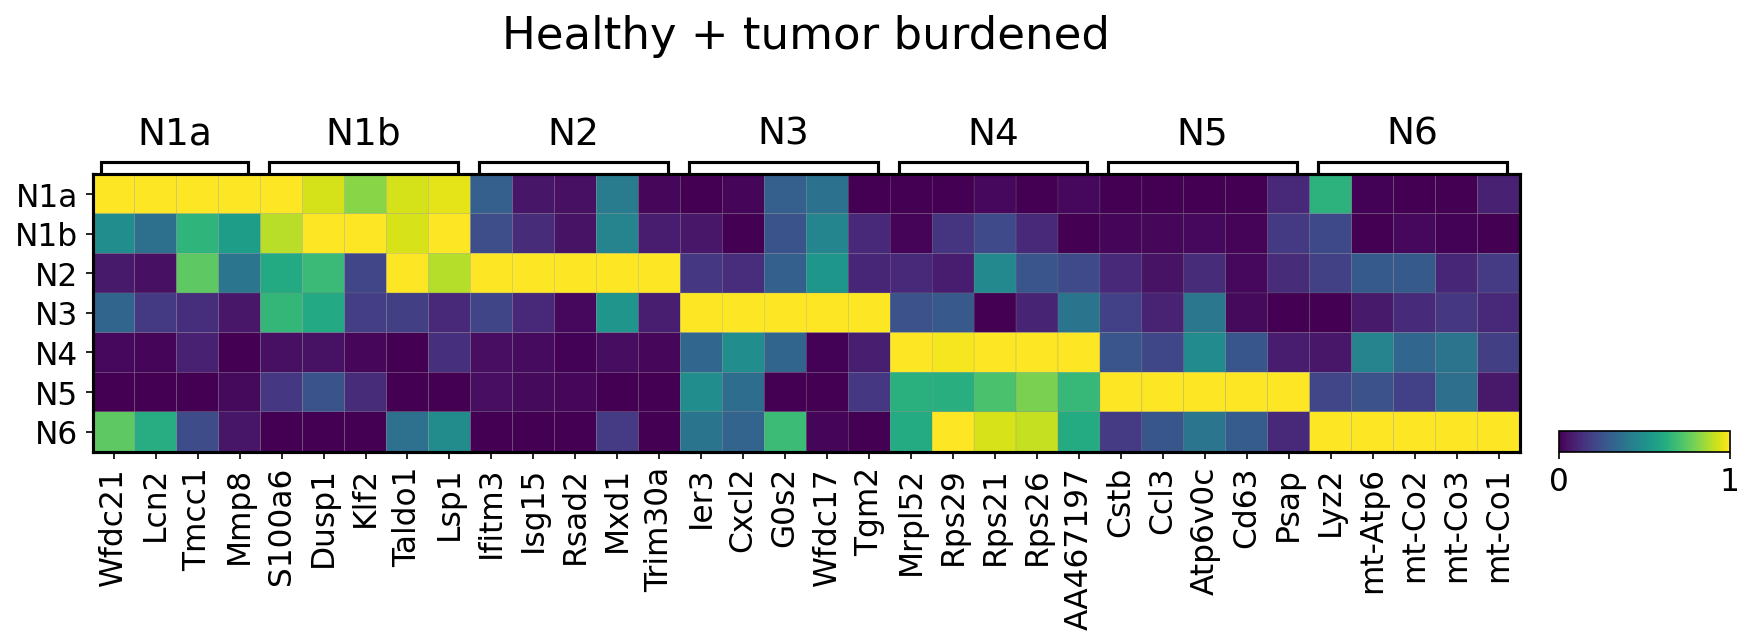

<Figure size 2400x600 with 0 Axes>

In [8]:
with mpl.rc_context({'figure.figsize':(16,4),
                     'font.size':18,
                     'figure.dpi':150}):
    sc.pl.matrixplot(ndata, var_names = untreated_markers, groupby='smoothed_Zilionis', 
                     layer='log1p', standard_scale='var', colorbar_title='', title='Healthy + tumor burdened')
    plt.tight_layout()

plt.show()

# Healthy (including N3-)

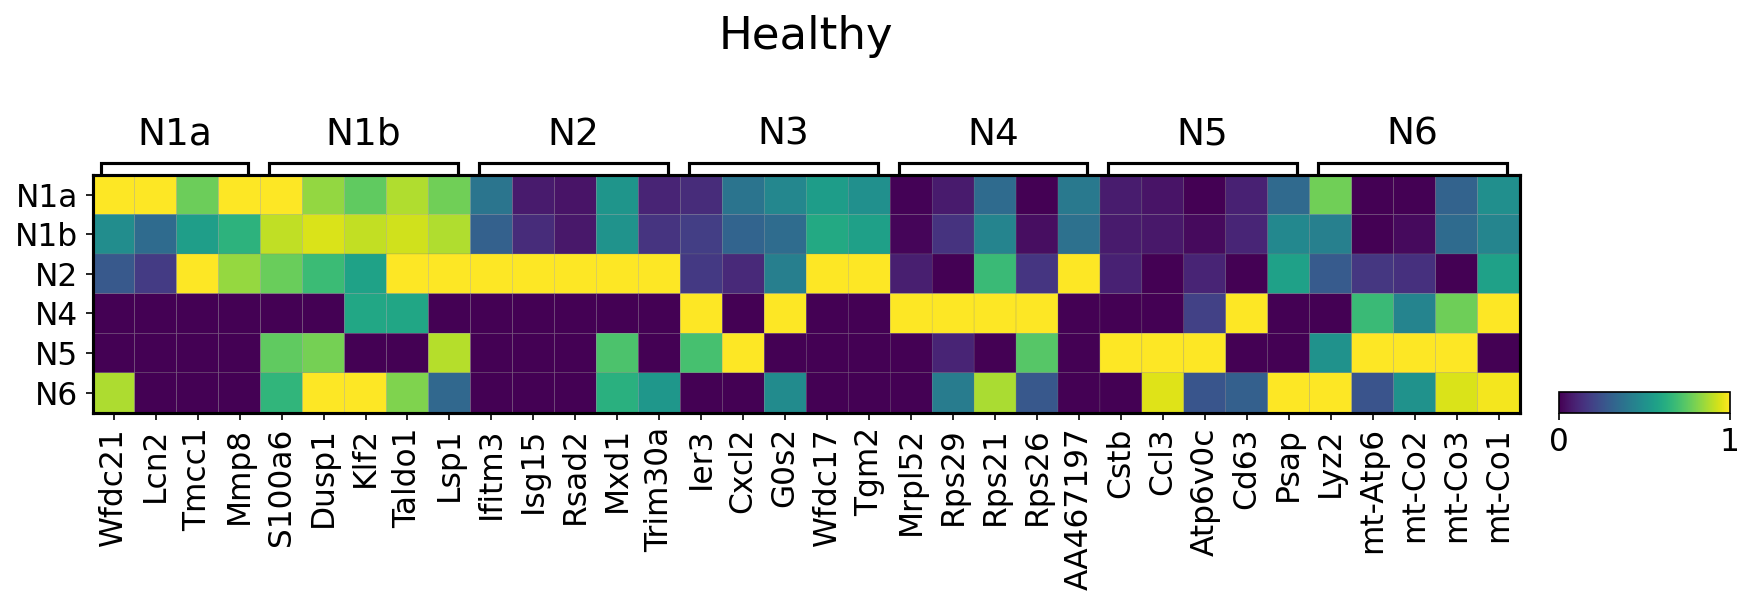

<Figure size 2400x600 with 0 Axes>

In [9]:
with mpl.rc_context({'figure.figsize':(16,4),
                     'font.size':18,
                     'figure.dpi':150}):
    sc.pl.matrixplot(hdata, var_names = untreated_markers, groupby='smoothed_Zilionis', layer='log1p', standard_scale='var', colorbar_title='', title='Healthy')
    plt.tight_layout()

plt.show()

# Healthy

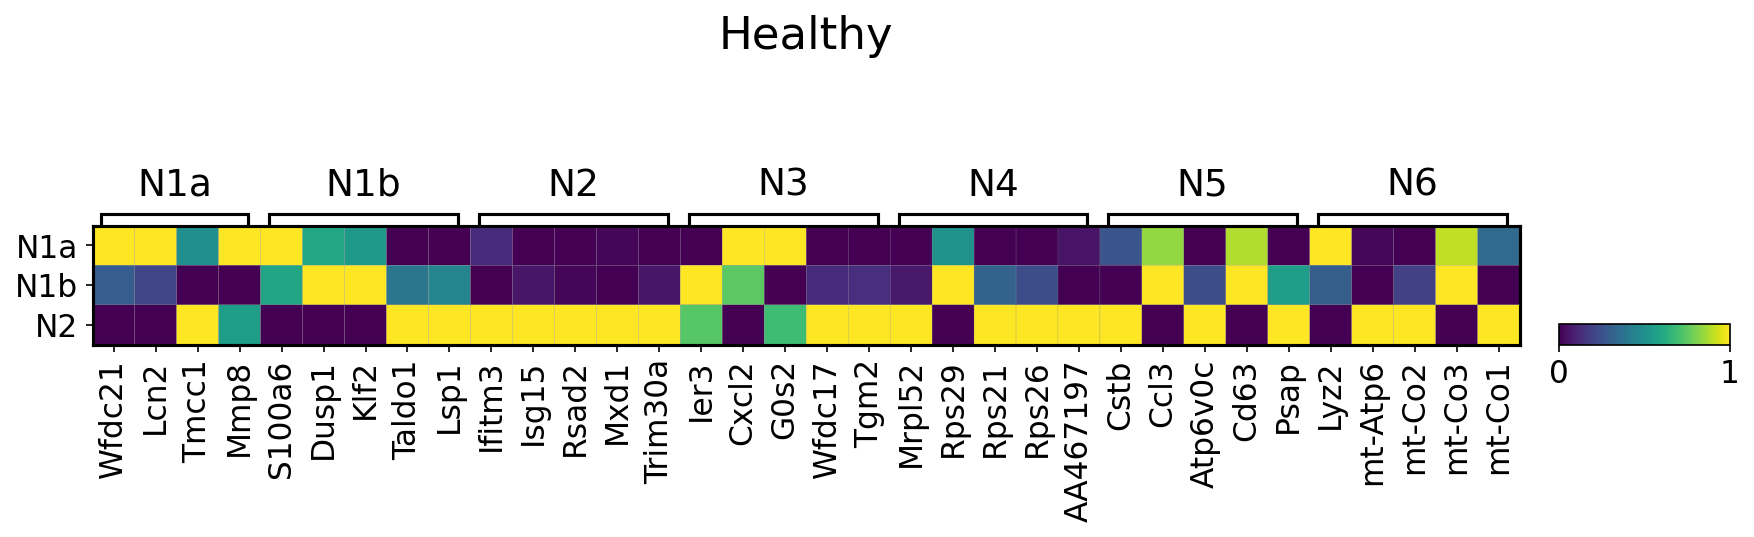

<Figure size 2400x600 with 0 Axes>

In [10]:
with mpl.rc_context({'figure.figsize':(16,4),
                     'font.size':18,
                     'figure.dpi':150}):
    sc.pl.matrixplot(hdata[hdata.obs['smoothed_Zilionis'].isin(['N1a','N1b','N2'])], 
                     var_names = untreated_markers, groupby='smoothed_Zilionis', 
                     layer='log1p', standard_scale='var', colorbar_title='', title='Healthy')
    plt.tight_layout()

plt.show()

# Tumor burdened

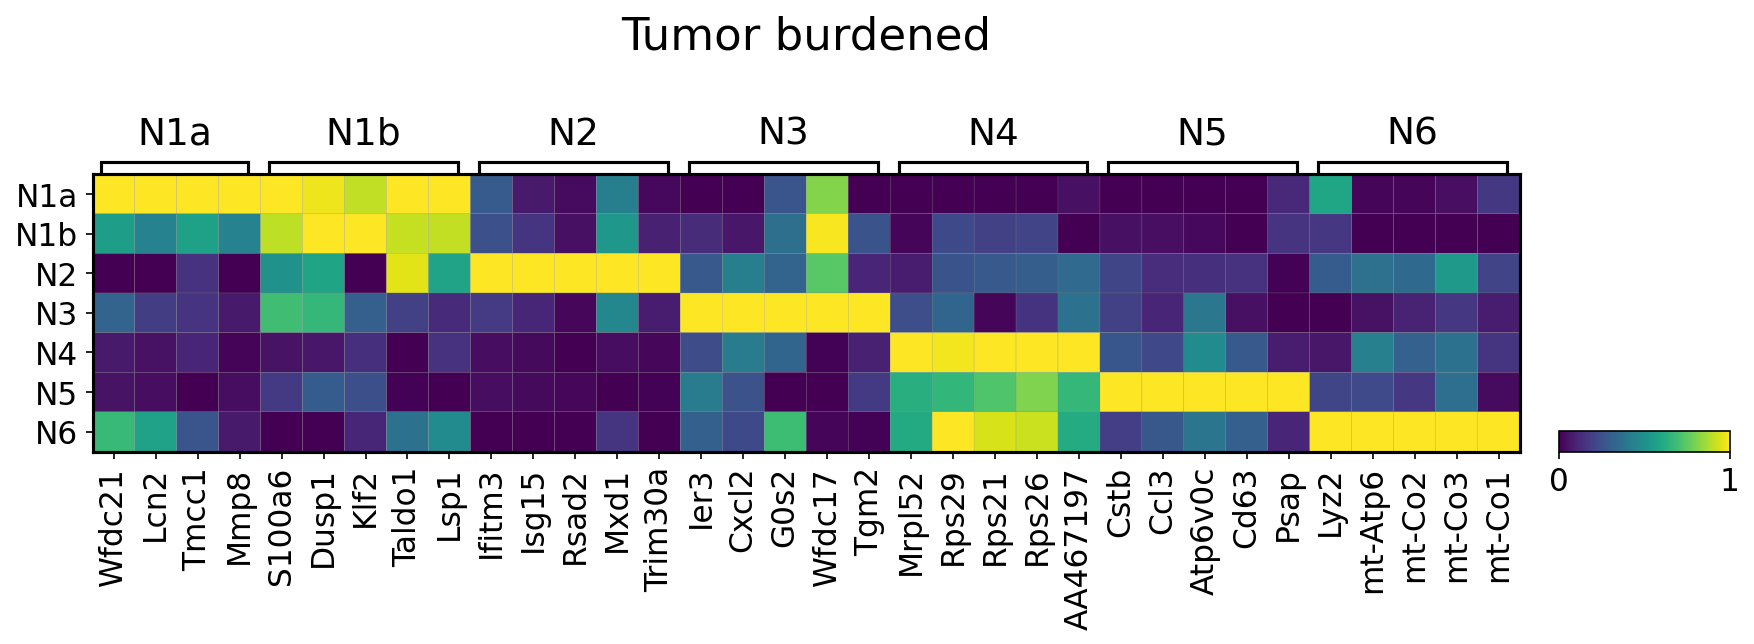

<Figure size 2400x600 with 0 Axes>

In [14]:
with mpl.rc_context({'figure.figsize':(16,4),
                     'font.size':18,
                     'figure.dpi':150}):
    sc.pl.matrixplot(udata, var_names = untreated_markers, groupby='smoothed_Zilionis', layer='log1p', 
                     standard_scale='var', colorbar_title='', title='Tumor burdened')
    plt.tight_layout()

plt.show()

# Treated

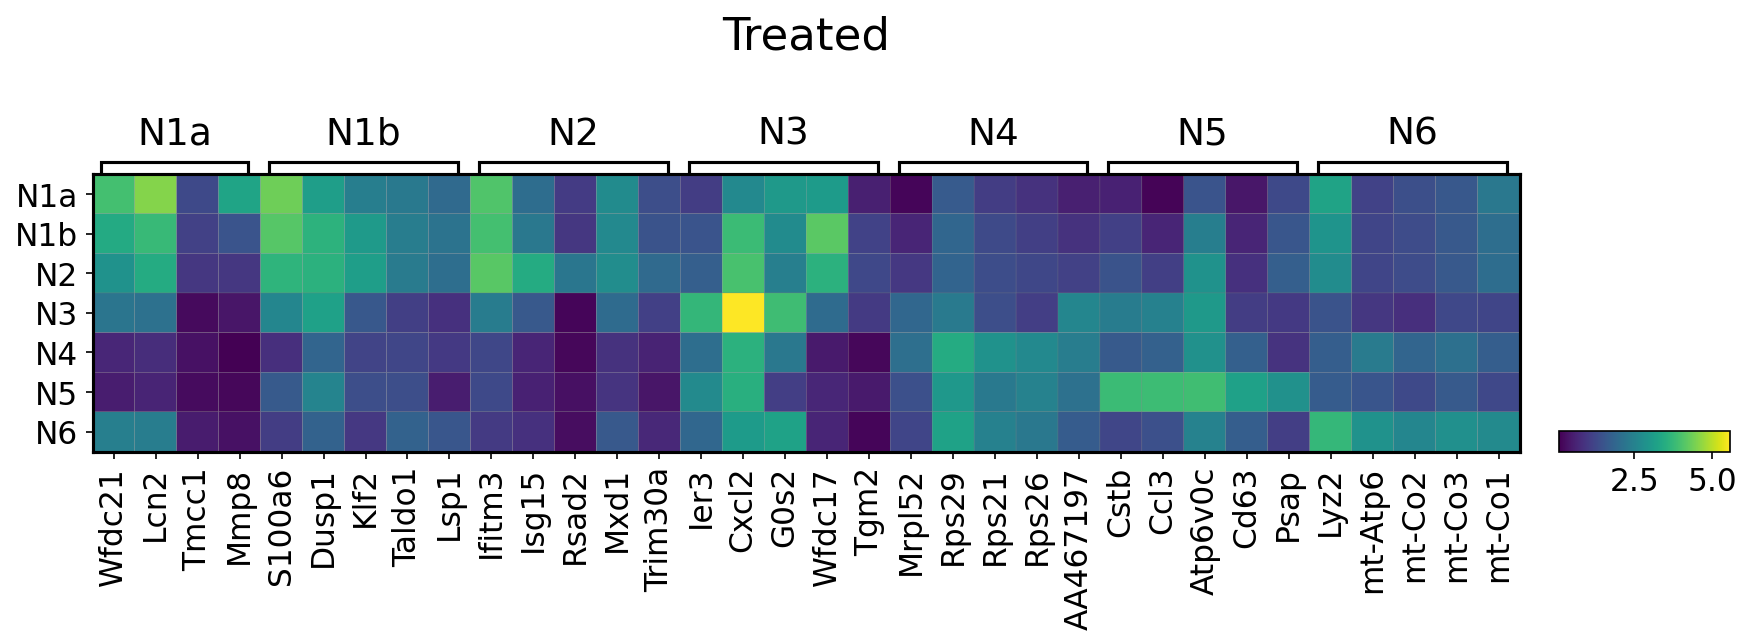

<Figure size 2400x600 with 0 Axes>

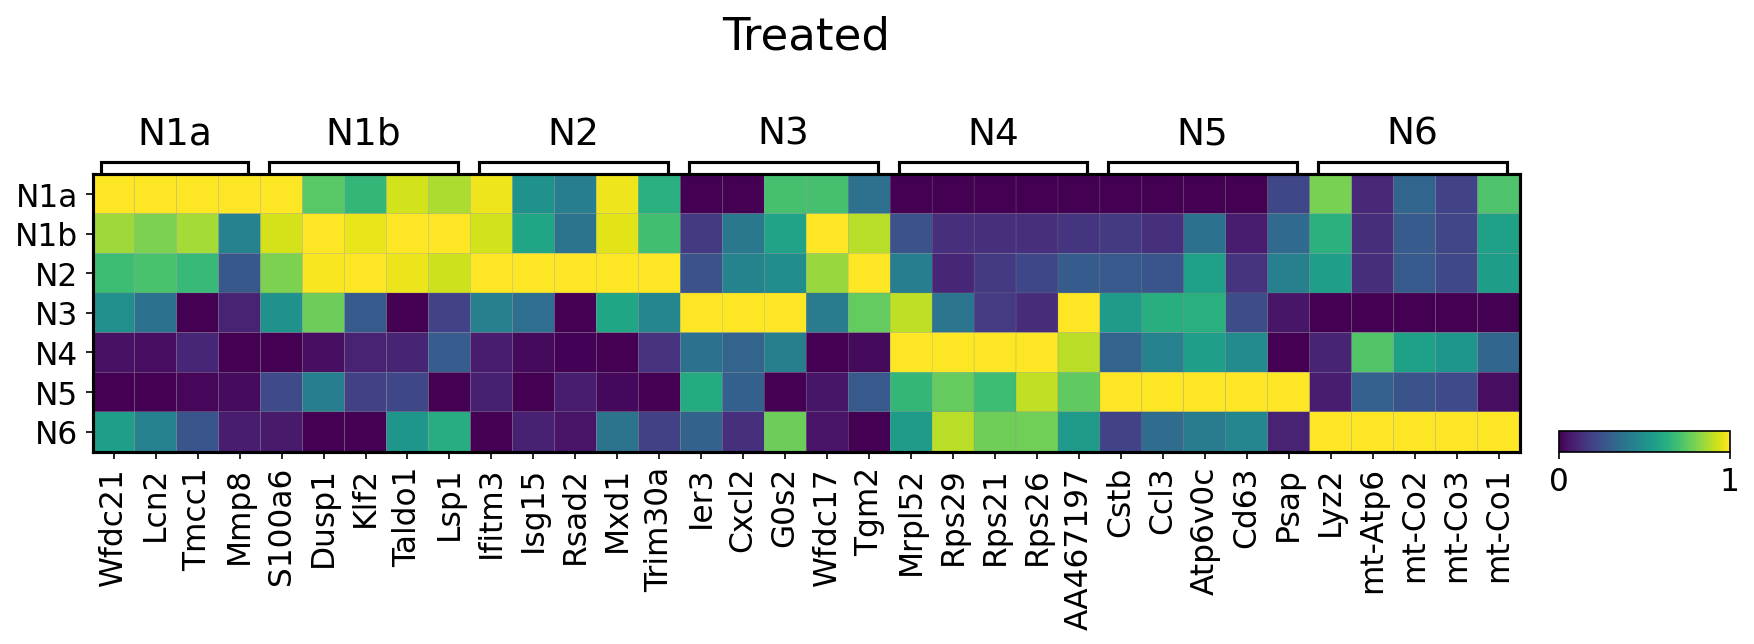

<Figure size 2400x600 with 0 Axes>

In [12]:
with mpl.rc_context({'figure.figsize':(16,4),
                     'font.size':18,
                     'figure.dpi':150}):
    sc.pl.matrixplot(tdata, var_names = untreated_markers, groupby='smoothed_Zilionis', 
                     layer='log1p', standard_scale='var', colorbar_title='', title='Treated')
    plt.tight_layout()

plt.show()